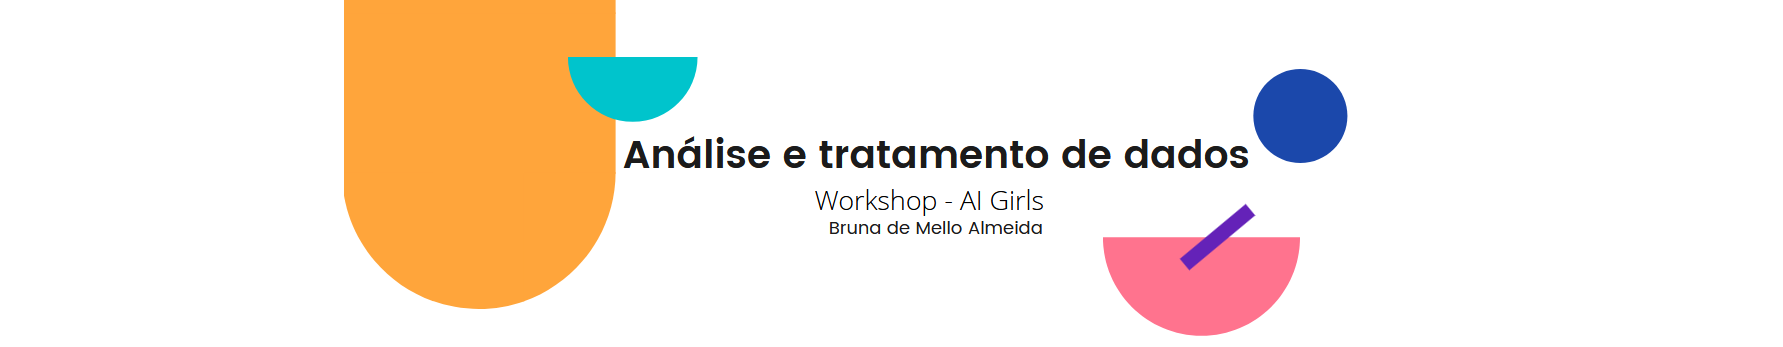

## **Parte 1: Demonstração**

Será utilizada a base de dados referente a alguns títulos disponíveis no stremming da netflix, os quais possuem métricas de avaliações (notas) provenientes do *IMDB, Metacritic e Tomatoes*. A base possui licença **CC0: Public Domain**. <br>
Para o workshop em questão, houveram alterações na base original para que se adequasse ao tema tratado. <br><br>

Base de Dados original: https://www.kaggle.com/ashishgup/netflix-rotten-tomatoes-metacritic-imdb <br>
Licença: https://creativecommons.org/publicdomain/zero/1.0/ <br> <br>

Materiais complementares: <br>
- Documentação da biblioteca pandas: https://pandas.pydata.org/docs/
- Livro: *Python para Análise de Dados*, O'REILLY



### <br>**Importação de Bibliotecas**

In [ ]:
# importando biblioteca

import pandas as pd

### <br>**Carregando base de dados e visualizando atributos** <br>
A biblioteca pandas suporta diferentes tipos de arquivos a serem carregados: *.csv, .txt, .json, .html, .xls* dentre outros. A forma correta de carregamento varia de acordo com a extensão do arquivo. <br>



In [ ]:
# carregando base 

df_netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/Workshop/dataset_netflix/netflix_pt1.csv",
                         encoding='UTF-8', sep=";")

In [ ]:
# verificando quantidade de instâncias (linhas) e atributos (colunas)

df_netflix.shape

(7740, 15)

In [ ]:
# verificando nome de cada atributo 

df_netflix.columns

Index(['Title', 'Genre', 'Languages', 'Series or Movie',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Netflix Release Date'],
      dtype='object')

In [ ]:
#visualizando dados das primeiras 5 linhas

df_netflix.head()

,Title,Genre,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,7.9,98.0,82.0,74.0,57.0,"$2,122,065",2021-03-04
1,HOW TO BUILD A GIRL,Comedy,English,Movie,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,5.8,79.0,69.0,1.0,NaN,"$70,632",2021-03-04
2,Centigrade,"Drama, Thriller",English,Movie,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",4.3,NaN,46.0,NaN,NaN,"$16,263",2021-03-04
3,ANNE+,Drama,Turkish,Series,"Belgium,Netherlands",< 30 minutes,NaN,NaN,6.5,NaN,NaN,1.0,NaN,NaN,2021-03-04
4,Moxie,"Animation, Short, Drama",English,Movie,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,6.3,NaN,NaN,NaN,4.0,NaN,2021-03-04


### **Analise inicial da base** <br>
A análise da base consiste, em um primeiro momento, em verificar quantidade de instâncias preenchidas, instâncias nulas, os tipos de dados de cada atributo, dentre outro.

In [ ]:
# verificando linhas nulas e 
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7740 entries, 0 to 7739
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  7740 non-null   object 
 1   Genre                  6704 non-null   object 
 2   Languages              6539 non-null   object 
 3   Series or Movie        7740 non-null   object 
 4   Country Availability   7731 non-null   object 
 5   Runtime                7740 non-null   object 
 6   Director               5197 non-null   object 
 7   Writer                 5237 non-null   object 
 8   IMDb Score             6462 non-null   float64
 9   Rotten Tomatoes Score  2213 non-null   float64
 10  Metacritic Score       1318 non-null   float64
 11  Awards Received        2379 non-null   float64
 12  Awards Nominated For   3099 non-null   float64
 13  Boxoffice              1131 non-null   object 
 14  Netflix Release Date   7740 non-null   object 
dtypes: f

In [ ]:
# outra formar de verificar valores nulos 

df_netflix.Genre.isnull().sum()

1036

In [ ]:
# verificando dados da coluna "Netflix Release Date"

df_netflix["Netflix Release Date"]

0       2021-03-04
1       2021-03-04
2       2021-03-04
3       2021-03-04
4       2021-03-04
           ...    
7735    2019-11-01
7736    2019-11-01
7737    2019-11-01
7738    2019-11-01
7739    2019-11-01
Name: Netflix Release Date, Length: 7740, dtype: object

In [ ]:
# realizando contagem por data de lançamento

df_netflix["Netflix Release Date"].value_counts()

2020-12-12    159
2018-10-01    126
2020-11-27    114
2020-09-05    112
2020-11-29     82
             ... 
2019-06-25      1
2019-08-11      1
2020-02-10      1
2020-02-24      1
2019-12-17      1
Name: Netflix Release Date, Length: 850, dtype: int64

In [ ]:
# verificando dados da coluna "Boxoffice"

df_netflix.Boxoffice 

0       $2,122,065
1          $70,632
2          $16,263
3              NaN
4              NaN
           ...    
7735           NaN
7736           NaN
7737           NaN
7738           NaN
7739           NaN
Name: Boxoffice, Length: 7740, dtype: object

### <br>**Análises estatísticas** <br>
A análise estatística permite a visualização da dispersão dos dados, análise de frequência através de histogramas, verificação de outlier com o uso do boxplot, e outras características como média, desvio padrão e percentis dos dados numéricos.

In [ ]:
df_netflix.describe()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For
count,6462.000000,2213.000000,1318.000000,2379.000000,3099.000000
mean,6.391411,62.406236,59.004552,7.256410,11.098096
std,1.174759,26.606789,17.132517,16.355563,27.138517
min,1.400000,0.000000,5.000000,1.000000,1.000000
25%,5.700000,43.000000,47.000000,1.000000,2.000000
50%,6.500000,67.000000,60.000000,3.000000,4.000000
75%,7.200000,85.000000,71.000000,7.000000,9.000000
max,9.700000,100.000000,99.000000,300.000000,355.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


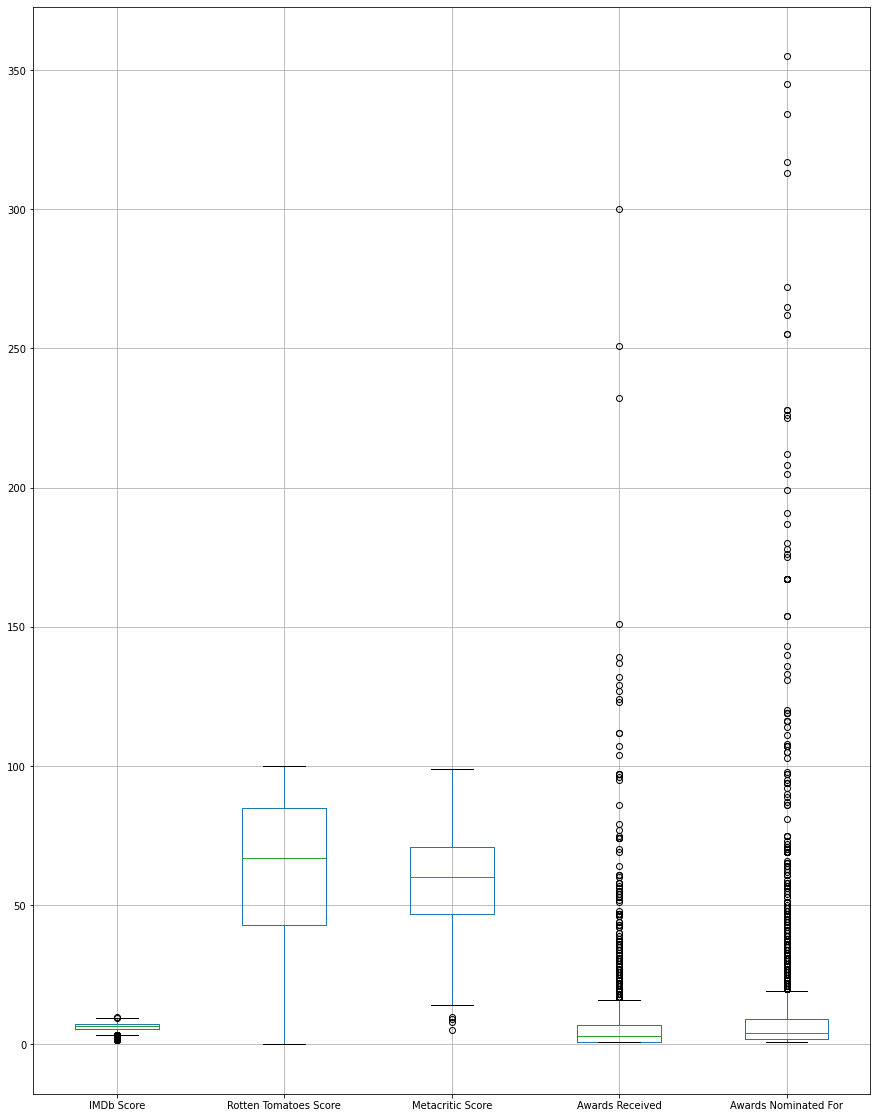

In [ ]:
# verificando a existência de outliers

df_netflix.boxplot(figsize = (15,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0928387d0>,
      dtype=object)

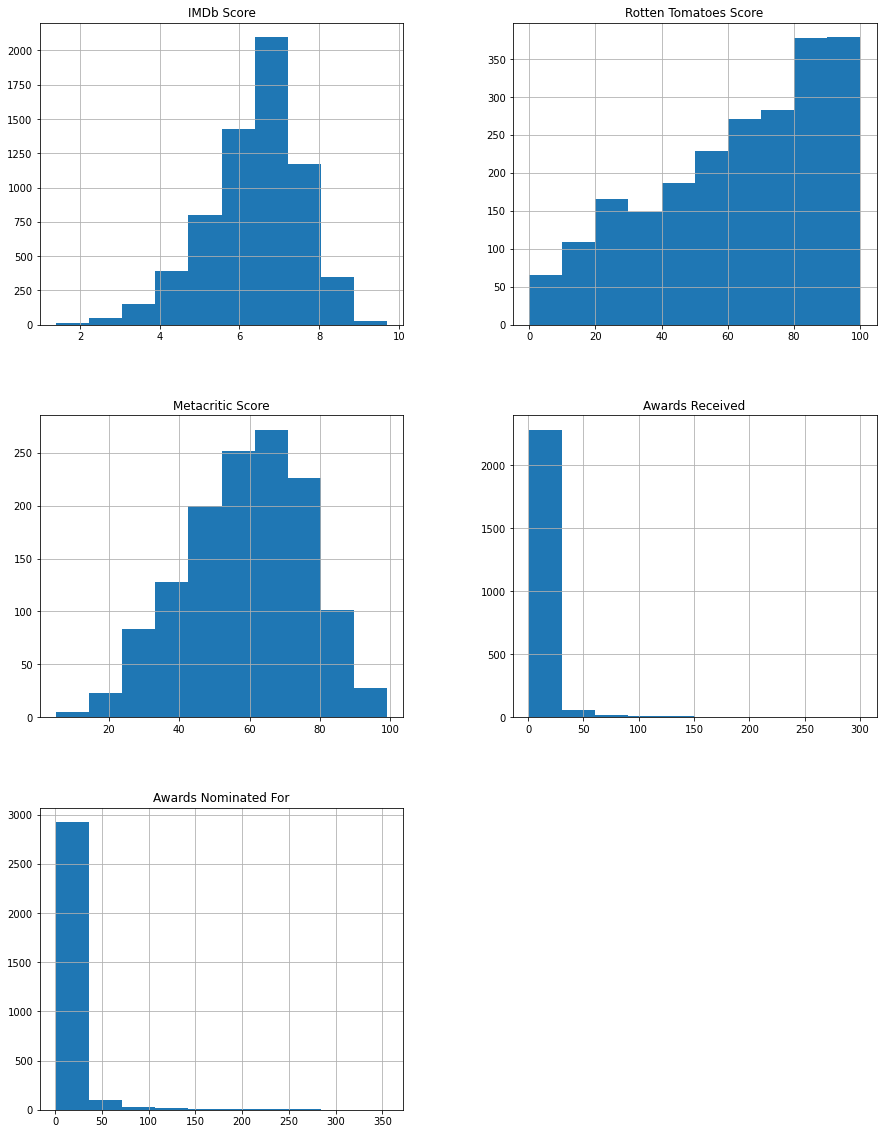

In [ ]:
# análise de frequência utilizando histogramas

df_netflix.hist(figsize = (15,20))

In [ ]:
# verificando correlações entre variáveis

df_netflix.corr()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For
IMDb Score,1.000000,0.702063,0.706098,0.229144,0.208956
Rotten Tomatoes Score,0.702063,1.000000,0.888717,0.226270,0.230864
Metacritic Score,0.706098,0.888717,1.000000,0.383887,0.398795
Awards Received,0.229144,0.226270,0.383887,1.000000,0.814894
Awards Nominated For,0.208956,0.230864,0.398795,0.814894,1.000000


### <br>**Tratando dados** <br>
O tratamento de dados é responsável por padronizar as instâncias de cada atributo. Nesta etapa, podemos preencher valores faltantes (nulos) quando necessário, alterar cada tipo de dado, realizar agrupamentos em categorias, dentre outros.

In [ ]:
# renomeando colunas

df_netflix.rename(columns = {'Title': 'Titulo',
                             'Genre': 'Genero',
                             'Languages': 'Linguagens',
                             'Series or Movie':'Categoria',
                             'Country Availability':'Disponibilidade_Geografica',
                             'Runtime':'Duracao',
                             'Director':'Diretor',
                             'Writer':'Escritor',
                             'IMDb Score':'IMDb_Score',
                             'Rotten Tomatoes Score':'Rotten_Tomatoes_Score',
                             'Metacritic Score':'Metacritic_Score',
                             'Awards Received':'Premios_Recebidos',
                             'Awards Nominated For':'Premios_Indicados',
                             'Boxoffice':'Receita_Bilheteria',
                             'Netflix Release Date':'Data_Lancamento_Netflix'},
                  inplace = True)

- Filtrando somente as colunas interessantes (retirando as colunas **Diretor** e **Escritor**)

In [ ]:
df_netflix = df_netflix[["Titulo", "Genero", "Linguagens", "Categoria", "Disponibilidade_Geografica",
                         "Duracao", "IMDb_Score", "Rotten_Tomatoes_Score", "Metacritic_Score",
                         "Premios_Recebidos", "Premios_Indicados", "Receita_Bilheteria", "Data_Lancamento_Netflix"]]

 - Como iremos avaliar a base levando-se em condideração os scores de avaliação, iremos eliminar as linhas das colunas **IMDb_Score, Metacritic_Score** e **Rotten_Tomatoes_Score** que estão com valores nulos:

In [ ]:
df_netflix = df_netflix.loc[~ df_netflix.IMDb_Score.isnull()]
df_netflix = df_netflix.loc[~ df_netflix.Metacritic_Score.isnull()]
df_netflix = df_netflix.loc[~ df_netflix.Rotten_Tomatoes_Score.isnull()]

# resetando a indexação do dataframe
df_netflix.reset_index(drop=True, inplace=True)

- A coluna **Genero**, possui diversas categorias listadas em apenas uma coluna. Vamos considerar somente o primeiro gênero listado:

In [ ]:
# definindo função

def altera_genero(x):
  x = x.split(",")[0]
  return x

# Substituindo valores nulos

df_netflix.Genero.fillna("NAO_DEFINIDO", inplace=True)

#  Alterando valores da coluna utilizando função já definida

df_netflix.Genero = df_netflix.Genero.apply(altera_genero)

df_netflix.Genero.value_counts()

Action         243
Drama          219
Comedy         189
Biography       84
Crime           69
Documentary     68
Animation       54
Horror          50
Adventure       40
Thriller         7
Fantasy          4
Mystery          3
Sci-Fi           2
War              1
Music            1
Name: Genero, dtype: int64

- A coluna **Receita_Bilheteria**, possui alguns caracteres que identificam a unidade monetária e estão dispostos de forma muito granular. Vamos corrigir retirando os caracteres indesejados e definindo faixas de valor:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff092077e90>]],
      dtype=object)

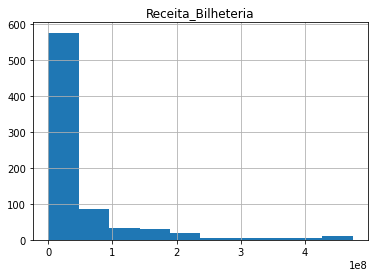

In [ ]:
# removendo caracteres
df_netflix.Receita_Bilheteria = df_netflix.Receita_Bilheteria.str.replace("$", "")
df_netflix.Receita_Bilheteria = df_netflix.Receita_Bilheteria.str.replace(",", "")

# preenchendo valores nulos
df_netflix.Receita_Bilheteria.fillna("NAO_DEFINIDO", inplace=True)

# removendo espaçoes indesejados, se existirem
df_netflix.Receita_Bilheteria = df_netflix.Receita_Bilheteria.str.strip()

# criando um novo dataframe para visualização do histograma
df_bilheteria = df_netflix[df_netflix.Receita_Bilheteria != "NAO_DEFINIDO"]
df_bilheteria = df_bilheteria[["Receita_Bilheteria"]]

df_bilheteria["Receita_Bilheteria"] = df_bilheteria["Receita_Bilheteria"].astype(int)
df_bilheteria.hist()

In [ ]:
# criando categorias para cada faixas de valores 
for i in df_netflix.Receita_Bilheteria:
  try:
    a = int(i)
    if a <= 50000000:
      df_netflix.Receita_Bilheteria = df_netflix.Receita_Bilheteria.replace(i, "1")
    else:
      df_netflix.Receita_Bilheteria = df_netflix.Receita_Bilheteria.replace(i, "2")
  except:
    pass

df_netflix.Receita_Bilheteria.value_counts()

1               692
NAO_DEFINIDO    259
2                83
Name: Receita_Bilheteria, dtype: int64

- A coluna **Data_Lancamento_Netflix** não possui o tipo de dado adequado às instâncias. Vamos corrigir:

In [ ]:
df_netflix.Data_Lancamento_Netflix = pd.to_datetime(df_netflix.Data_Lancamento_Netflix)

- As colunas referentes aos scores de avaliação, possuem escalas diferentes. Enquanto as colunas **Rotten_Tomatoes_Score** e **Metacritic_Score** possuem uma faixa de valores variando de 0 a 100, a coluna **IMDb_Score** varia de 0 a 10. Vamos ajustar para deixar todos os valores variando de 0 a 10:

In [ ]:
def divide_valor(x):
  x = x/10
  return x

df_netflix.Rotten_Tomatoes_Score = df_netflix.Rotten_Tomatoes_Score.apply(divide_valor)
df_netflix.Metacritic_Score = df_netflix.Metacritic_Score.apply(divide_valor)

- Como visto no boxplot, as colunas **Premios_Indicados** e **Premios_Recebidos**, possuem muitos outliers e valores nulos. Vamos corrigir estes valores substituindo pela média (caso sejam outliers) e substituindo por 0 (caso estejam nulos):

In [ ]:
premios_indicados_mean = df_netflix[df_netflix["Premios_Indicados"] <= 19].Premios_Indicados.mean()

premios_recebidos_mean = df_netflix[df_netflix["Premios_Recebidos"] <= 11].Premios_Recebidos.mean()

df_netflix["Premios_Indicados"] = df_netflix["Premios_Indicados"].map(lambda x: premios_indicados_mean if x > 19 else x)
df_netflix["Premios_Recebidos"] = df_netflix["Premios_Recebidos"].map(lambda x: premios_recebidos_mean if x > 11 else x)

df_netflix["Premios_Indicados"].fillna(0, inplace=True)
df_netflix["Premios_Recebidos"].fillna(0, inplace=True)

- Para visualizar um score unificado, vamos calcular a média entre as colunas **IMDb_Score, Metacritic_Score** e **Rotten_Tomatoes_Score** e armazenar este resultado em uma nova coluna, denominada **Total_Score**:

In [ ]:
df_netflix["Total_Score"] = (df_netflix["IMDb_Score"] + df_netflix["Metacritic_Score"] + df_netflix["Rotten_Tomatoes_Score"])/3

- Vamos ajustar a coluna **Disponibilidade_Geografica** para identificar a quantidade de países em que o título está disponíveis, em vez de listar esses países:

In [ ]:
def conta_paises(x):
  if x != "NAO_DEFINIDO":
    listagem_paises = list(x.split(","))
    x = str(len(listagem_paises))
  else:
    x = "0"
  return x

# preenchendo valores nulos 
df_netflix.Disponibilidade_Geografica.fillna("NAO_DEFINIDO", inplace=True)

# aplicando a função
df_netflix.Disponibilidade_Geografica = df_netflix.Disponibilidade_Geografica.apply(conta_paises)

# mudando tipo de dados 
df_netflix.Disponibilidade_Geografica = df_netflix.Disponibilidade_Geografica.astype(int)

### <br>**Exportando os dados** <br>

In [ ]:
# exportando arquivo .txt

df_netflix.to_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/datasets/Netflix/netflix_base_final.txt",
                  header=True,
                  index=False,
                  sep=";")

### <br> **Tópico extra: Cruzando bases** <br>
 O cruzamento de bases utilizando o comando pd.merge pode ser uma alternativa em relação ao excel e ao SQL. Muita das vezes, dependendo do tamanho da base carregado, é muito mais rápido e eficaz fazendo diretamente via linha de código. <br><br>


In [ ]:
# carregando a base crua
df_netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/datasets/Netflix/netflix.csv",
                         encoding='UTF-8')

In [ ]:
# a ideia de dividir as bases por atributos (abaixo) é utilizar e explicar o comando MERGE do pandas

df_netflix_pt1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/datasets/Netflix/netflix.csv",
                                  encoding='UTF-8',
                                usecols=["Title", "Netflix Link", "Genre", "Tags", "Languages", "Series or Movie", "Hidden Gem Score", "Country Availability", "Runtime", "Director",
                                         "Writer", "Actors", "Production House", "Summary", "Boxoffice", "Release Date", "Netflix Release Date"])

df_netflix_pt2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/datasets/Netflix/netflix.csv",
                                    encoding='UTF-8',
                                    usecols=["Title", "Netflix Link", "View Rating", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score",
                                             "Awards Received", "Awards Nominated For", "IMDb Votes", "IMDb Link", "Image", "Poster", "TMDb Trailer", "Trailer Site"])

In [ ]:
#visualizando o shape de cada base 

print("df_netflix_pt1: " + str(df_netflix_pt1.shape)) 
print("df_netflix_pt2: " + str(df_netflix_pt2.shape))

df_netflix_pt1: (15480, 17)
df_netflix_pt2: (15480, 14)


In [ ]:
#visualizando as colunas de cada base 

print("df_netflix_pt1: " + str(df_netflix_pt1.columns))
print("df_netflix_pt2: " + str(df_netflix_pt2.columns))

df_netflix_pt1: Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'Boxoffice', 'Release Date', 'Netflix Release Date',
       'Production House', 'Netflix Link', 'Summary'],
      dtype='object')
df_netflix_pt2: Index(['Title', 'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'Awards Received', 'Awards Nominated For',
       'Netflix Link', 'IMDb Link', 'IMDb Votes', 'Image', 'Poster',
       'TMDb Trailer', 'Trailer Site'],
      dtype='object')


In [ ]:
df_netflix_total = pd.merge(df_netflix_pt1, df_netflix_pt2, left_on=["Title", "Netflix Link"], right_on=["Title", "Netflix Link"], how='inner')

In [ ]:
# verificando se quantidade de instâncias e atributos do dataset gerado é igual ao dataset original

df_netflix_total.shape

(15480, 29)

In [ ]:
# verificando se as colunas do dataset gerado é igual do dataset original

list_original = set(df_netflix)
list_final = set(df_netflix_total)

a =[]
for i in list_final:
  if i in list_original: 
    a.append(True)
  else:
    a.append(False)

set(a)

{True}

## **Parte 2: Hands on** <br>
Com a segunda parte de base, armazenada no arquivo *netflix_pt2.csv*, responder as seguintes perguntas a seguir, de acordo com as funções e metódos aprendidos:

In [ ]:
# carregando base 

df_netflix = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Análise de Dados/datasets/Netflix/netflix_pt2.csv",
                         encoding='UTF-8', sep=";")

- Quantos valores nulos as colunas *IMDb_Score* e *Genero* possuem, respectivamente?

In [ ]:
#verificando informações gerais 

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7699 entries, 0 to 7698
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Titulo                      7699 non-null   object 
 1   Genero                      7034 non-null   object 
 2   Linguagens                  6974 non-null   object 
 3   Categoria                   7699 non-null   object 
 4   Disponibilidade_Geografica  7689 non-null   object 
 5   Duracao                     7698 non-null   object 
 6   Diretor                     5550 non-null   object 
 7   Escritor                    5889 non-null   object 
 8   IMDb_Score                  6887 non-null   float64
 9   Rotten_Tomatoes_Score       4147 non-null   float64
 10  Metacritic_Score            3003 non-null   float64
 11  Premios_Recebidos           3680 non-null   float64
 12  Premios_Indicados           4546 non-null   float64
 13  Receita_Bilheteria          2863 

In [ ]:
# verificando nulos da coluna IMDb_Score

df_netflix.IMDb_Score.isnull().sum()

812

In [ ]:
# verificando nulos da coluna Genero

df_netflix.Genero.isnull().sum()

665

- Qual a média referente a coluna *Rotten_Tomatoes_Score*?

In [ ]:
df_netflix.Rotten_Tomatoes_Score.mean()

58.04219918013021

- Quais colunas da base possuem outliers?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


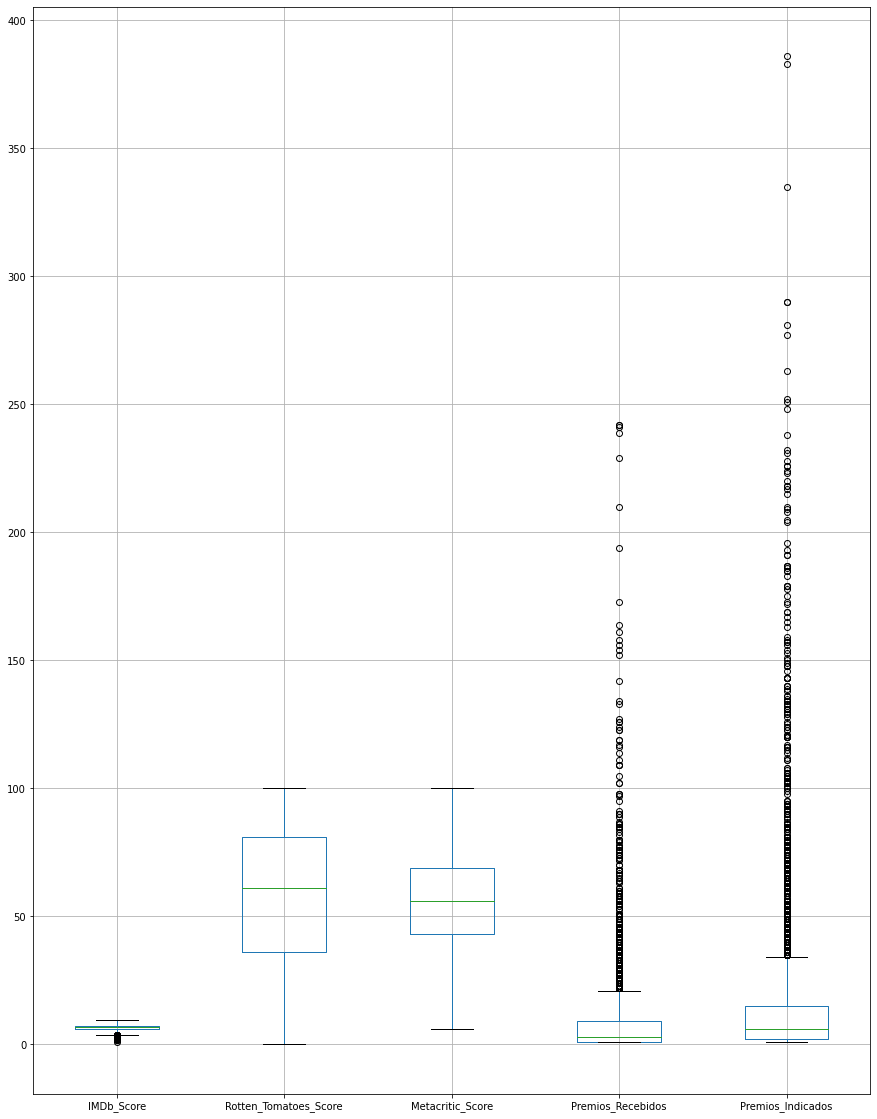

In [ ]:
df_netflix.boxplot(figsize = (15,20))

- Quantos títulos foram disponibilizados na plataforma no ano de 2019?<br>*dica: extrair o ano utilizando df_netflix.Data_Lancamento_Netflix.dt.year*

In [ ]:
# modificando tipo de dados para datetime

df_netflix.Data_Lancamento_Netflix = pd.to_datetime(df_netflix.Data_Lancamento_Netflix)

# armazenando coluna de Ano no dataset 

df_netflix.Data_Lancamento_Netflix.dt.year.value_counts()

2015    3220
2017    1643
2016    1344
2018    1170
2019     322
Name: Data_Lancamento_Netflix, dtype: int64

- Qual a correlação entre as variáveis *IMDb_Score* e *Premios_Recebidos*?

In [ ]:
# usando a função corr()

df_netflix.corr()

,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,Premios_Recebidos,Premios_Indicados
IMDb_Score,1.000000,0.725578,0.730205,0.321635,0.332877
Rotten_Tomatoes_Score,0.725578,1.000000,0.907868,0.340058,0.354947
Metacritic_Score,0.730205,0.907868,1.000000,0.454106,0.478421
Premios_Recebidos,0.321635,0.340058,0.454106,1.000000,0.818201
Premios_Indicados,0.332877,0.354947,0.478421,0.818201,1.000000
